<a href="https://colab.research.google.com/github/MaksonViini/Hackhaton-BNDES/blob/develop/Operacoes_BNDES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_parquet('/content/drive/Shareddrives/bndes-arquivos/operacoes.parquet')
# df_ativos = pd.read_parquet('/content/drive/Shareddrives/bndes-arquivos/cnpj_ativas.parquet')

In [ ]:
df_ativos.head()

In [ ]:
df.head()

,cliente,cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao,origem,valor_contratado_reais,descricao_do_projeto,numero_do_contrato,tipo_de_garantia,tipo_de_excepcionalidade,id
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,16000.0,16000.0,RECURSOS LIVRES - TESOURO,TAXA FIXA,"8,75",24,36,REEMBOLSAVEL,INDIRETA,BNDES AUTOMATICO,OUTROS,NAO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUARIA E PESCA,AgropecuA¡ria,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUARIA,AGROPECUARIA,MICRO,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA,AUTOMATICA,16000.0,0,0,0,0,382320001SP
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,8047.0,8047.0,RECURSOS VINCULADOS - FAT DEPA“SITOS ESPECIAIS,TAXA FIXA,"4,0",0,60,REEMBOLSAVEL,INDIRETA,BNDES AUTOMATICO,PRONAF INVESTIMENTO,NAO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUARIA E PESCA,AgropecuA¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUARIA,AGROPECUARIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8047.0,0,0,0,0,165600001RS
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,8104.0,8104.0,RECURSOS VINCULADOS - FAT DEPA“SITOS ESPECIAIS,TAXA FIXA,"4,0",12,48,REEMBOLSAVEL,INDIRETA,BNDES AUTOMATICO,PRONAF INVESTIMENTO,NAO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUARIA E PESCA,AgropecuA¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUARIA,AGROPECUARIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8104.0,0,0,0,0,165600001RS
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,6304.0,6304.0,RECURSOS VINCULADOS - FAT DEPA“SITOS ESPECIAIS,TAXA FIXA,"4,0",12,48,REEMBOLSAVEL,INDIRETA,BNDES AUTOMATICO,PRONAF INVESTIMENTO,NAO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUARIA E PESCA,AgropecuA¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUARIA,AGROPECUARIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,6304.0,0,0,0,0,165600001RS
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,15000.0,15000.0,RECURSOS VINCULADOS - FAT DEPA“SITOS ESPECIAIS,TAXA FIXA,"4,0",0,60,REEMBOLSAVEL,INDIRETA,BNDES AUTOMATICO,PRONAF INVESTIMENTO,NAO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUARIA E PESCA,AgropecuA¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUARIA,AGROPECUARIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,15000.0,0,0,0,0,165600001RS


In [ ]:
df['natureza_do_cliente'].unique()

array(['PRIVADA', 'ADMINISTRAÃ‡ÃƒO PÃšBLICA DIRETA - GOVERNO MUNICIPAL',
       'PÃšBLICA INDIRETA',
       'ADMINISTRAÃ‡ÃƒO PÃšBLICA DIRETA - GOVERNO ESTADUAL',
       'ADMINISTRAÃ‡ÃƒO PÃšBLICA DIRETA - GOVERNO FEDERAL'], dtype=object)

In [ ]:
data = df.copy()

## OneHot

In [ ]:
# X = data[['setor_cnae', 'porte_do_cliente']]
# enc = OrdinalEncoder().fit(X)
# data[['setor_cnae', 'porte_do_cliente']] = enc.transform(X)

In [ ]:
data['juros'] = data['juros'].apply(lambda x: x.replace(',', '.'))

In [ ]:
func_porte = lambda x: (0 if x == 'MICRO' else
  1 if x == 'PEQUENA' else
  2 if x == 'GRANDE' else
  3)

func_setor = lambda x: (0 if x == 'AGROPECUÃ�RIA E PESCA' else 
                        1 if x == 'COMERCIO E SERVICOS' else 
                        2 if x == 'INDUSTRIA DE TRANSFORMAÃ‡ÃƒO' else 
                        3)

In [ ]:
data['porte_do_cliente'] = data['porte_do_cliente'].apply(func_porte)
data['setor_cnae'] = data['setor_cnae'].apply(func_setor)

In [ ]:
df['setor_cnae'].unique()

array(['AGROPECUÃ�RIA E PESCA', 'COMERCIO E SERVICOS',
       'INDUSTRIA DE TRANSFORMAÃ‡ÃƒO', 'INDUSTRIA EXTRATIVA'],
      dtype=object)

In [ ]:
data['porte_do_cliente'].unique()

array([0, 1, 2, 3])

In [ ]:
data.shape

(2102928, 34)

In [ ]:
data['produto'].unique()

array(['BNDES AUTOMÃ�TICO', 'BNDES FINAME', 'BNDES FINAME AGRÃ�COLA',
       'BNDES FINAME LEASING', 'BNDES FINEM', 'BNDES NÃƒO REEMBOLSÃ�VEL',
       'BNDES PROJECT FINANCE', 'BNDES EMPRÃ‰STIMO PONTE',
       'BNDES DEBENTURES SIMPLES', 'OUTROS', 'BNDES LIMITE DE CRÃ‰DITO',
       'OPERAÃ‡ÃƒO FINANCEIRA', 'BNDES EXIM PÃ“S-EMBARQUE',
       'BNDES MICROCRÃ‰DITO', 'BNDES RENEGOCIAÃ‡ÃƒO',
       'BNDES CRÃ‰DITO DIRETO MÃ‰DIAS EMPRESAS', 'BNDES DIRETO 10',
       'BNDES DEBENTURES SUSTENTAVEIS E DE INFRAESTRUTURA'], dtype=object)

In [ ]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=False) * 100

valor_contratado_reais                0.930369
valor_desembolsado_reais              0.139662
fonte_de_recurso_desembolsos          0.000000
forma_de_apoio                        0.000000
modalidade_de_apoio                   0.000000
prazo_amortizacao_meses               0.000000
prazo_carencia_meses                  0.000000
juros                                 0.000000
custo_financeiro                      0.000000
tipo_de_excepcionalidade              0.000000
instrumento_financeiro                0.000000
valor_em_reais                        0.000000
data_da_contratacao                   0.000000
municipio_codigo                      0.000000
municipio                             0.000000
uf                                    0.000000
cnpj                                  0.000000
produto                               0.000000
inovacao                              0.000000
tipo_de_garantia                      0.000000
natureza_do_cliente                   0.000000
numero_do_con

In [ ]:
df.columns

Index(['cliente', 'cnpj', 'uf', 'municipio', 'municipio_codigo',
       'data_da_contratacao', 'valor_em_reais', 'valor_desembolsado_reais',
       'fonte_de_recurso_desembolsos', 'custo_financeiro', 'juros',
       'prazo_carencia_meses', 'prazo_amortizacao_meses',
       'modalidade_de_apoio', 'forma_de_apoio', 'produto',
       'instrumento_financeiro', 'inovacao', 'area_operacional', 'setor_cnae',
       'subsetor_cnae_agrupado', 'subsetor_cnae_codigo', 'subsetor_cnae_nome',
       'setor_bndes', 'subsetor_bndes', 'porte_do_cliente',
       'natureza_do_cliente', 'instituicao_financeira_credenciada',
       'cnpj_do_agente_financeiro', 'situacao', 'origem',
       'valor_contratado_reais', 'descricao_do_projeto', 'numero_do_contrato',
       'tipo_de_garantia', 'tipo_de_excepcionalidade'],
      dtype='object')

In [ ]:
data = data.drop(['valor_desembolsado_reais', 'valor_contratado_reais'], axis=1)

In [ ]:
data['juros'].astype(np.number)

0          8.75
1          4.00
2          4.00
3          4.00
4          4.00
           ... 
2102923    1.39
2102924    1.39
2102925    1.39
2102926    1.39
2102927    5.05
Name: juros, Length: 2102928, dtype: float64

In [ ]:
columns = ['setor_cnae', 'porte_do_cliente']

In [ ]:
X = data[columns].values

# Clusterizacao Setor CNAE X Porte do cliente

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

In [ ]:
X_clusted = kmeans.predict(X)

In [ ]:
X_clusted

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
data['Cluster'] = X_clusted

In [ ]:
columns = ['setor_cnae', 'porte_do_cliente', 'Cluster']

In [ ]:
df1 = data[columns]

In [ ]:
df1[['setor_cnae', 'porte_do_cliente']] = enc.inverse_transform(data[['setor_cnae', 'porte_do_cliente']])

In [ ]:
df1.head()

,setor_cnae,porte_do_cliente,Cluster
0,0,0,3
1,0,0,3
2,0,0,3
3,0,0,3
4,0,0,3


### Analise Setor x Porte

In [ ]:
data.groupby('Cluster')['valor_em_reais'].mean().reset_index().round(2)

,Cluster,valor_em_reais
0,0,127972.56
1,1,1796143.68
2,2,204424.98
3,3,54215.63


In [ ]:
 df1.groupby('setor_cnae')['Cluster'].value_counts()

setor_cnae  Cluster
0           3          302940
            1           32401
1           0          581171
            1          506963
            2          350605
2           1          179067
            0           69373
            2           65300
3           1            6540
            2            4424
            0            4144
Name: Cluster, dtype: int64

In [ ]:
func_setor = lambda x: (0 if x == 'AGROPECUÃ�RIA E PESCA' else 
                        1 if x == 'COMERCIO E SERVICOS' else 
                        2 if x == 'INDUSTRIA DE TRANSFORMAÃ‡ÃƒO' else 
                        3)

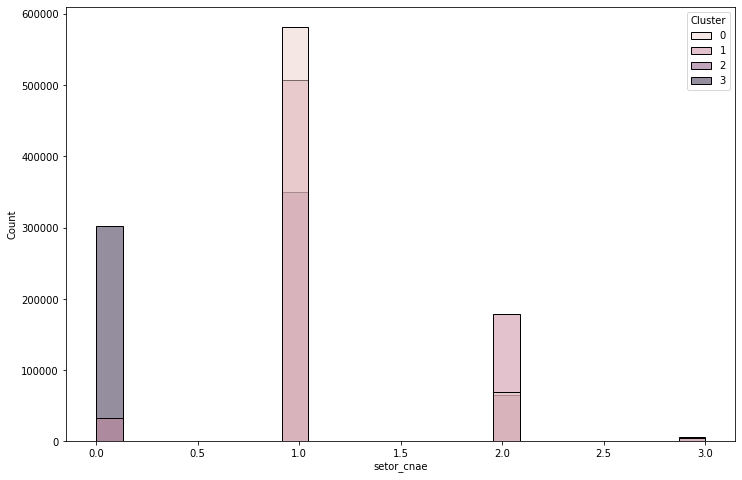

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(x='setor_cnae', hue='Cluster', data=data)

### Setor CNAE X Valor em reais

In [ ]:
data = df.copy()

In [ ]:
data.head()

,cliente,cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao,origem,valor_contratado_reais,descricao_do_projeto,numero_do_contrato,tipo_de_garantia,tipo_de_excepcionalidade
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,16000.0,16000.0,RECURSOS LIVRES - TESOURO,TAXA FIXA,8.75,24,36,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,OUTROS,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA,AUTOMATICA,16000.0,0,0,0,0
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,8047.0,8047.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,0,60,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8047.0,0,0,0,0
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,8104.0,8104.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,12,48,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8104.0,0,0,0,0
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,6304.0,6304.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,12,48,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,6304.0,0,0,0,0
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,15000.0,15000.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,0,60,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,15000.0,0,0,0,0


In [ ]:
dfx = data.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data['valor_em_reais'].values
scaler = StandardScaler().fit(X.reshape(-1, 1))
dfx['valor_em_reais'] = scaler.transform(X.reshape(-1, 1))

In [ ]:
dfx.head()

,cliente,cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao,origem,valor_contratado_reais,descricao_do_projeto,numero_do_contrato,tipo_de_garantia,tipo_de_excepcionalidade
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,-0.034296,16000.0,RECURSOS LIVRES - TESOURO,TAXA FIXA,8.75,24,36,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,OUTROS,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA,AUTOMATICA,16000.0,0,0,0,0
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,-0.034690,8047.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,0,60,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8047.0,0,0,0,0
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,-0.034687,8104.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,12,48,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8104.0,0,0,0,0
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,-0.034776,6304.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,12,48,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,6304.0,0,0,0,0
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,-0.034345,15000.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,0,60,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,15000.0,0,0,0,0


In [ ]:
columns = ['setor_cnae', 'valor_em_reais']

X = dfx[columns].values

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

In [ ]:
X_clusted = kmeans.predict(X)

In [ ]:
dfx['Cluster'] = X_clusted

In [ ]:
dfx['valor_em_reais'] = scaler.inverse_transform(dfx['valor_em_reais'])

In [ ]:
valor_em_reais, setor_cnae, porte_do_cliente, natureza_do_cliente

In [ ]:
dfx.head()

,cliente,cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao,origem,valor_contratado_reais,descricao_do_projeto,numero_do_contrato,tipo_de_garantia,tipo_de_excepcionalidade,Cluster
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,16000.0,16000.0,RECURSOS LIVRES - TESOURO,TAXA FIXA,8.75,24,36,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,OUTROS,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA,AUTOMATICA,16000.0,0,0,0,0,0
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,8047.0,8047.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,0,60,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8047.0,0,0,0,0,0
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,8104.0,8104.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,12,48,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,8104.0,0,0,0,0,0
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,6304.0,6304.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,12,48,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,6304.0,0,0,0,0,0
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,15000.0,15000.0,RECURSOS VINCULADOS - FAT DEPÃ“SITOS ESPECIAIS,TAXA FIXA,4.0,0,60,REEMBOLSÃ�VEL,INDIRETA,BNDES AUTOMÃ�TICO,PRONAF INVESTIMENTO,NÃƒO,AREA DE OPERACOES E CANAIS DIGITAIS,0,AgropecuÃ¡ria,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÃ�RIA,AGROPECUÃ�RIA,0,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA,15000.0,0,0,0,0,0


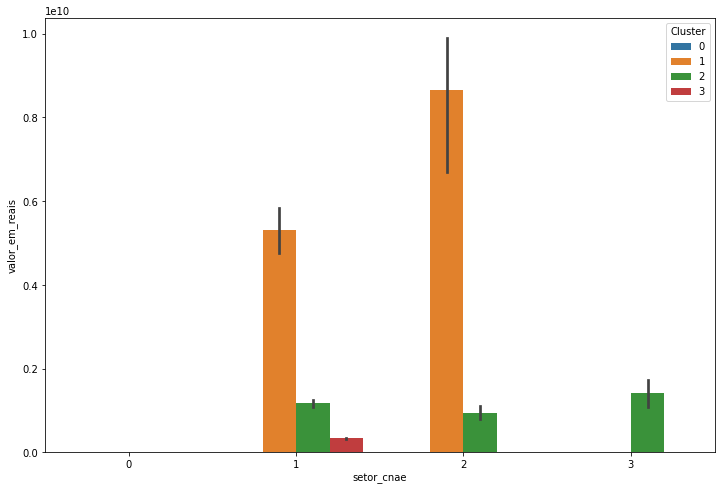

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='setor_cnae', y='valor_em_reais', hue='Cluster', data=dfx)